# Topics in Contemporary Physics Project 2022
## Julian Bandhan

### Predicting survivability based on data from titanic dataset

In [1]:
%matplotlib notebook     
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Dataset

Using the titanic dataset, and making a variable that allows us to access later on

In [2]:
# making a dataframe variable:
passenger = pd.read_csv('titanic.csv') #titanic data


# to see the first few lines of the dataframe:
passenger.head()

Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  \
0    male  22.0                        1                        0   7.2500   
1  female  38.0                        1                        0  71.2833   
2  female  26.0                        0                        0   7.9250   
3  female  35.0                        1                        0  53.1000   
4    male  35.0                        0                        0   8.0500   

   sex  
0    0  
1    1  
2    1  
3    1  
4    0

# Prepping our Dataset

We extract data from our dataset based on the specific features we are looking at

<IPython.core.display.Javascript object>


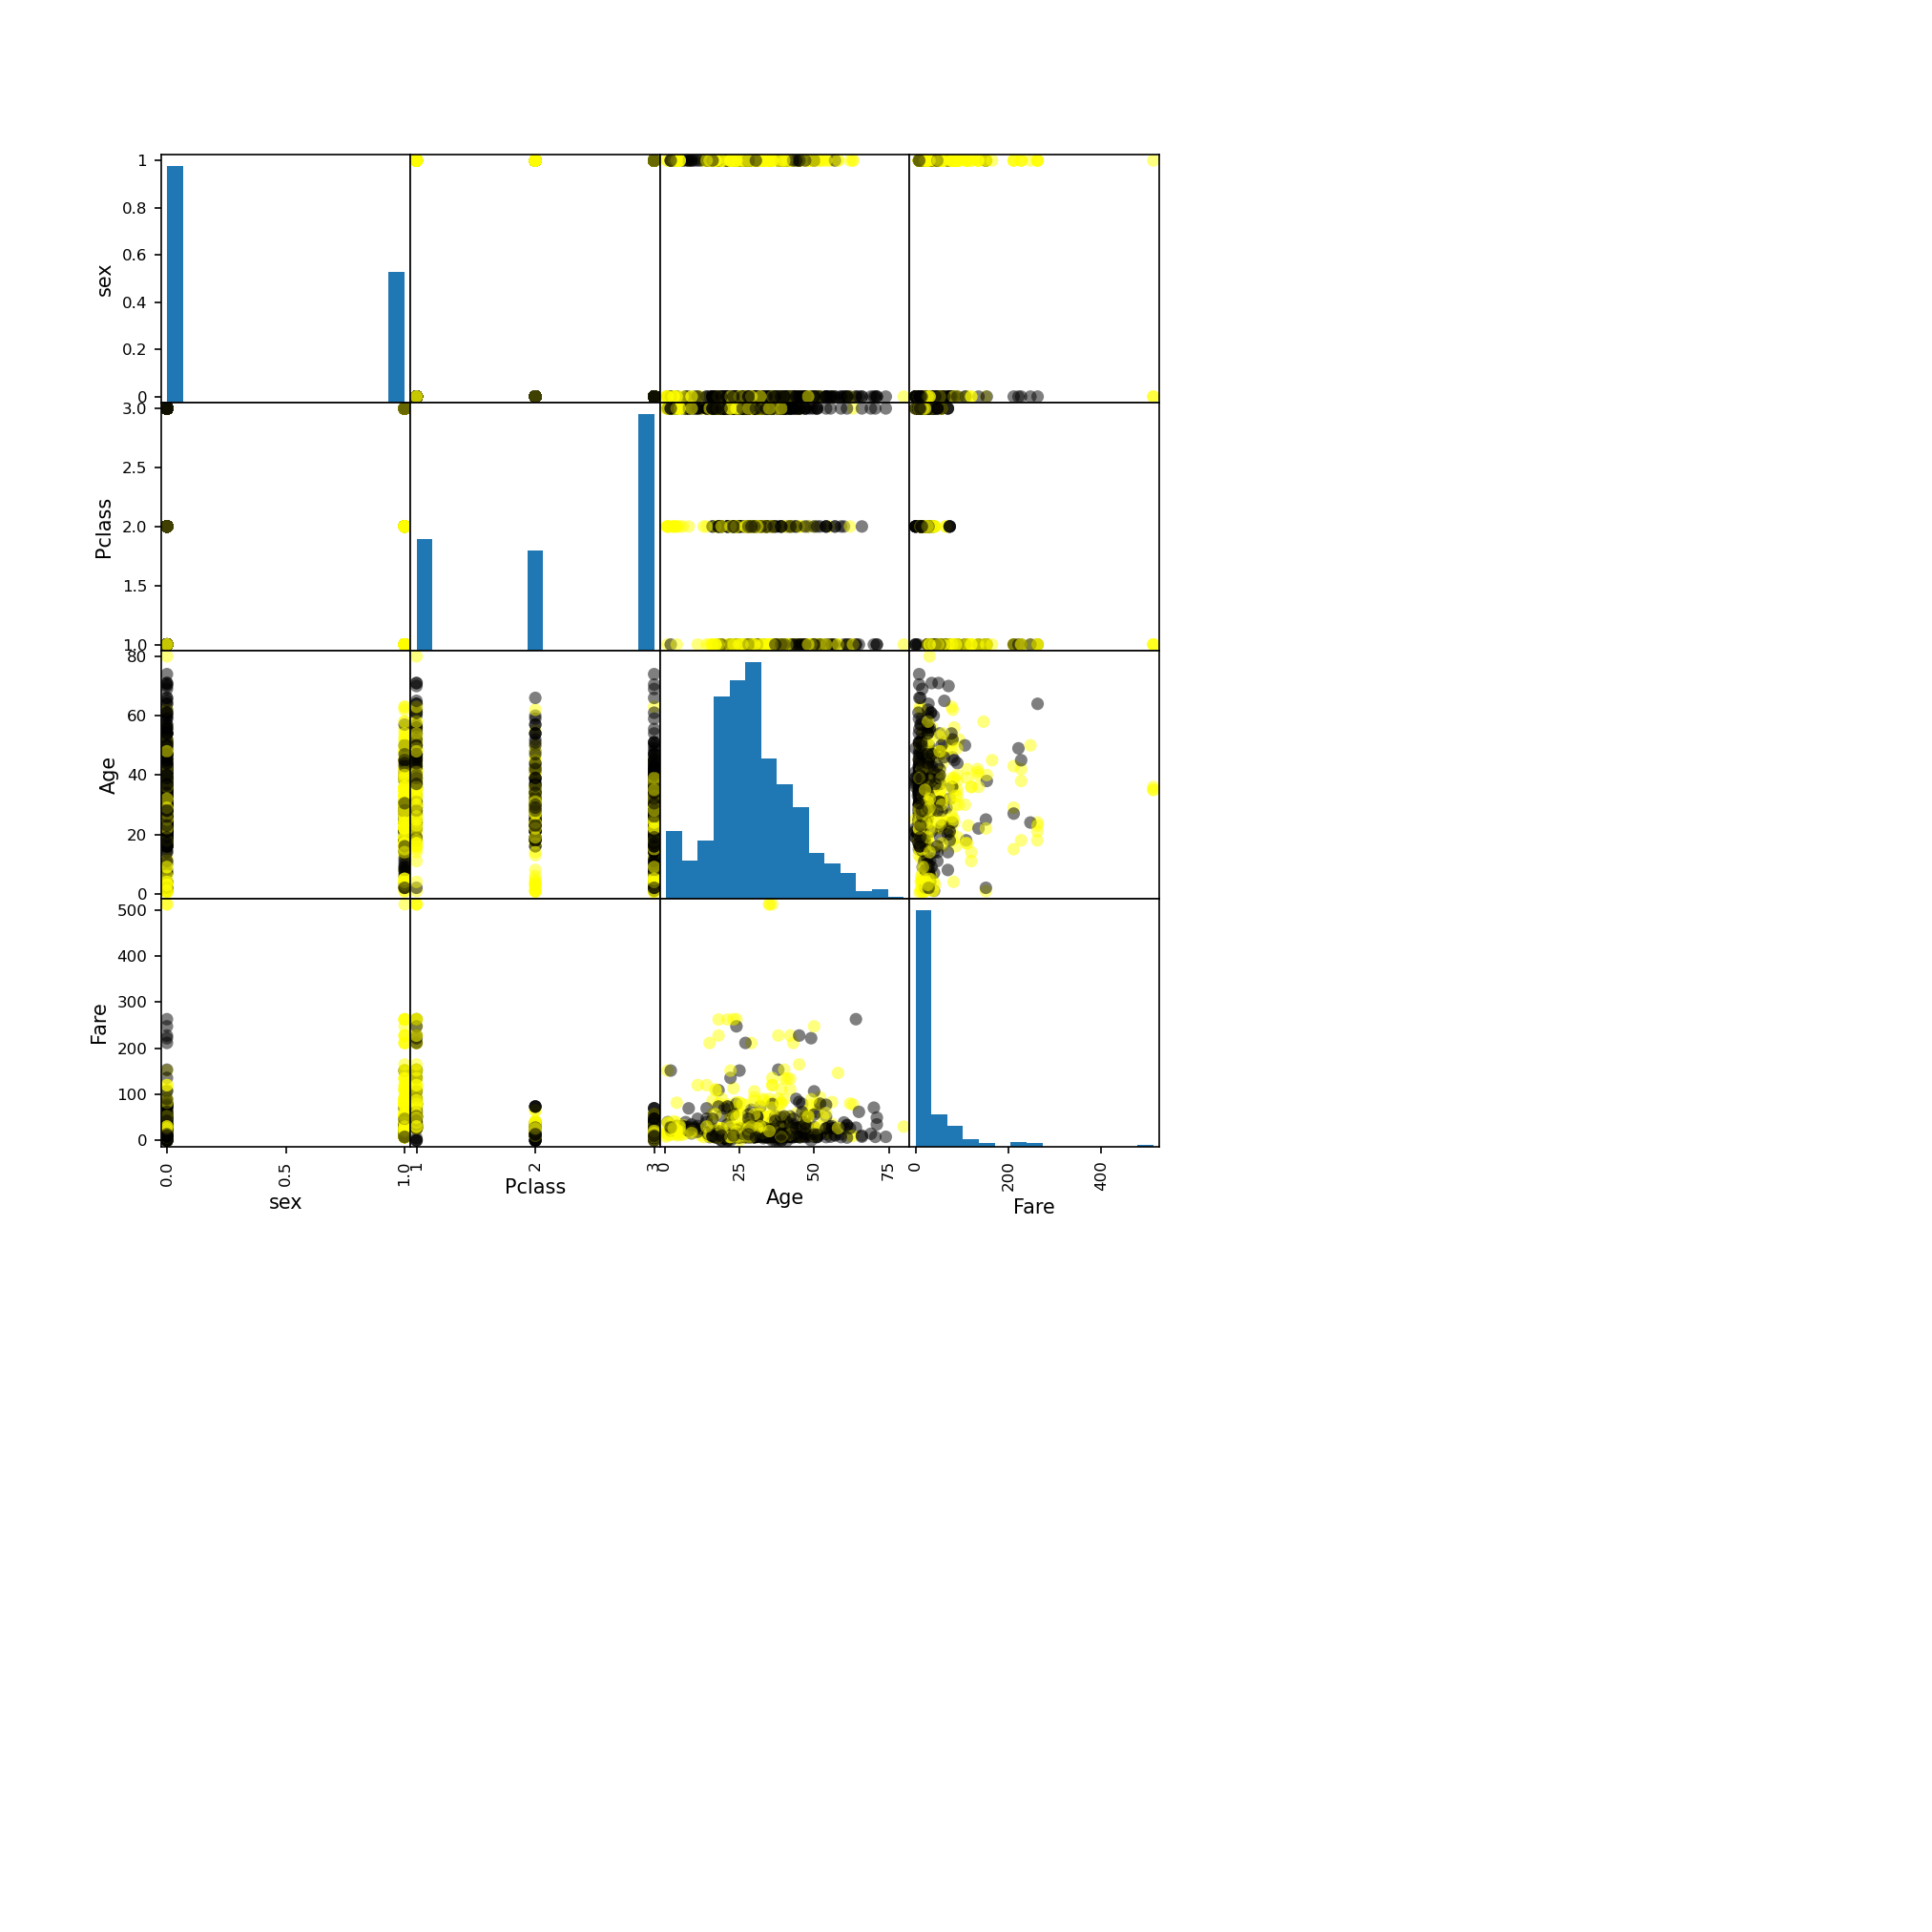

[Text(0, 0, '0'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.8'),
 Text(0, 0, '1')]

In [3]:
# plotting a scatter matrix
from matplotlib import cm

#X = passenger[['sex', 'Age']]
X = passenger[['sex', 'Pclass', 'Age', 'Fare']]
y = passenger['Survived']
#Splits the dataset, 80-20% chosen because it has highest accuracy from later analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1-0.8)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
scatter[0,0].set_yticklabels([0,0.2,0.4,0.6,0.8,1])

# KnNClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
# creating an instance of the kNN classifier, chosen because it has highest accuracy
knn = KNeighborsClassifier(n_neighbors = 15)   
knn.fit(X_train, y_train)

# score method to evaluate the accuracy of the classifier: a number between 0 and 1, the bigger the better 
knn.score(X_test, y_test)

0.7471910112359551

<IPython.core.display.Javascript object>


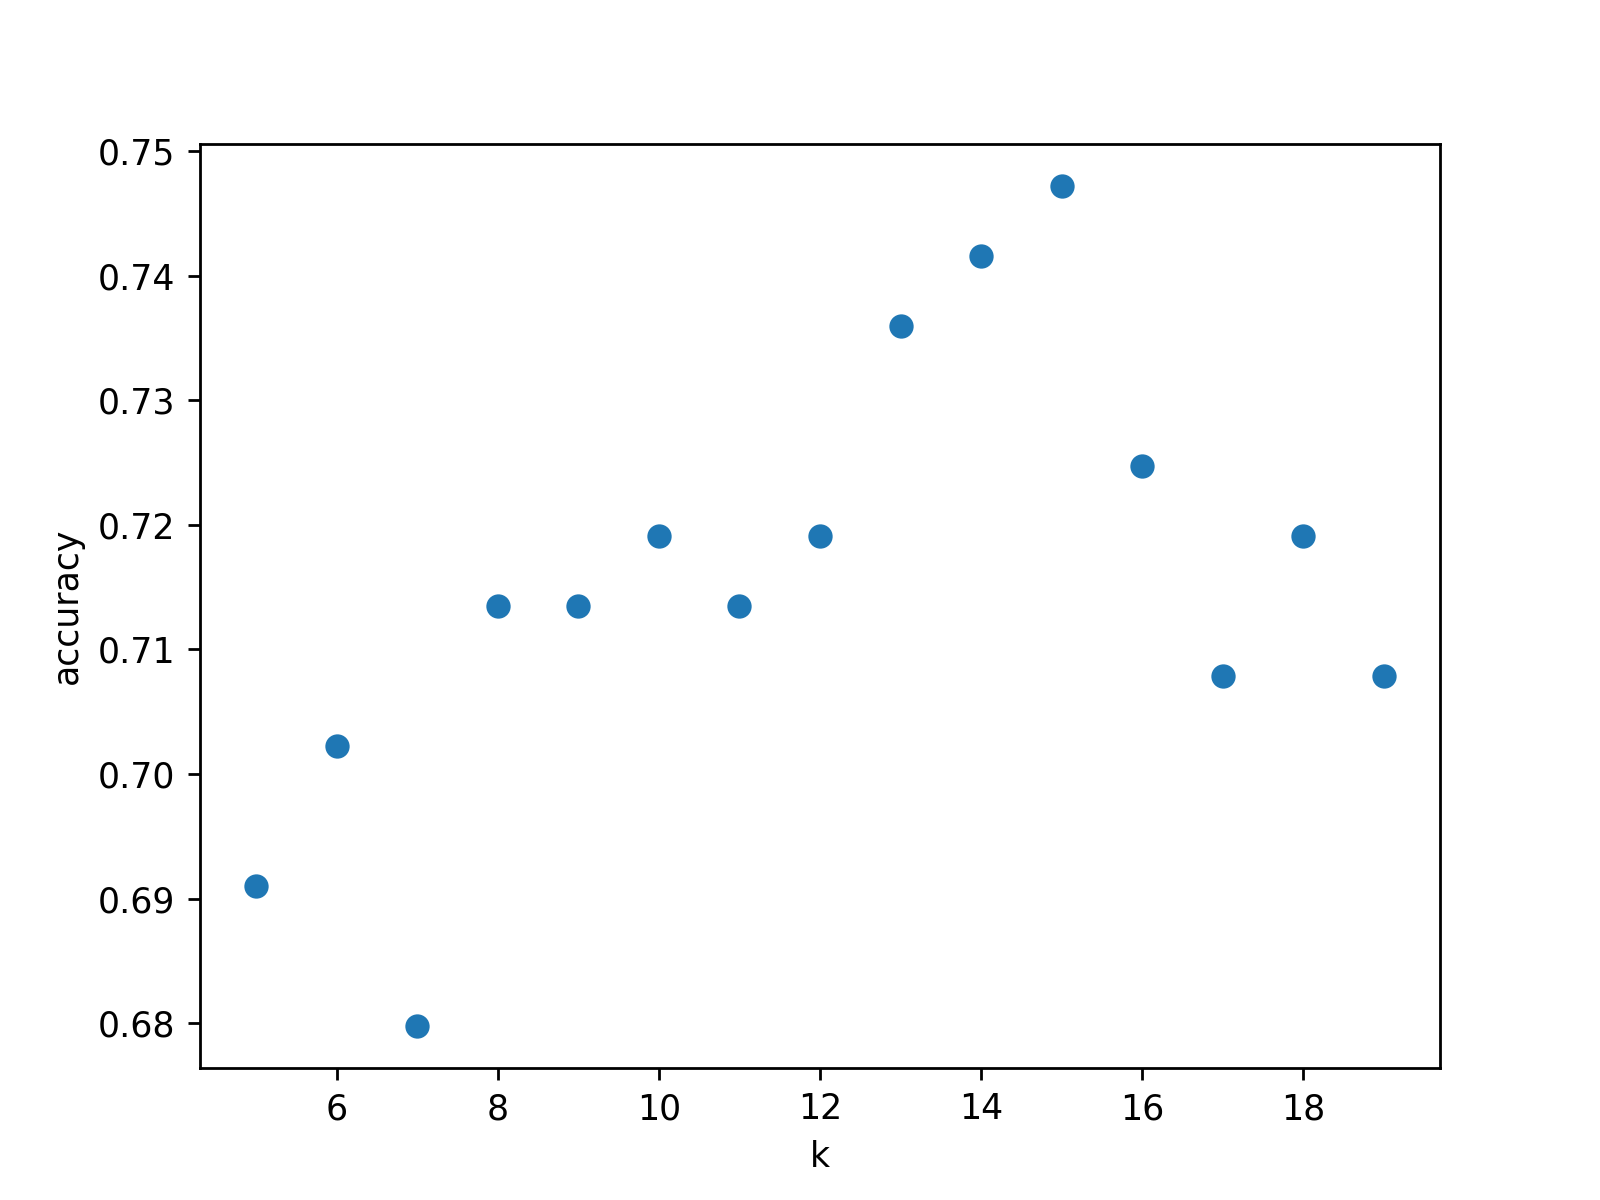

15


In [40]:
k_range = range(5,20)
scores = []

#Finds the accuracy of difference k-values
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

#Plots k vs. accuracy
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
print(k_range[np.where(scores==np.amax(scores))[0][0]])

<IPython.core.display.Javascript object>


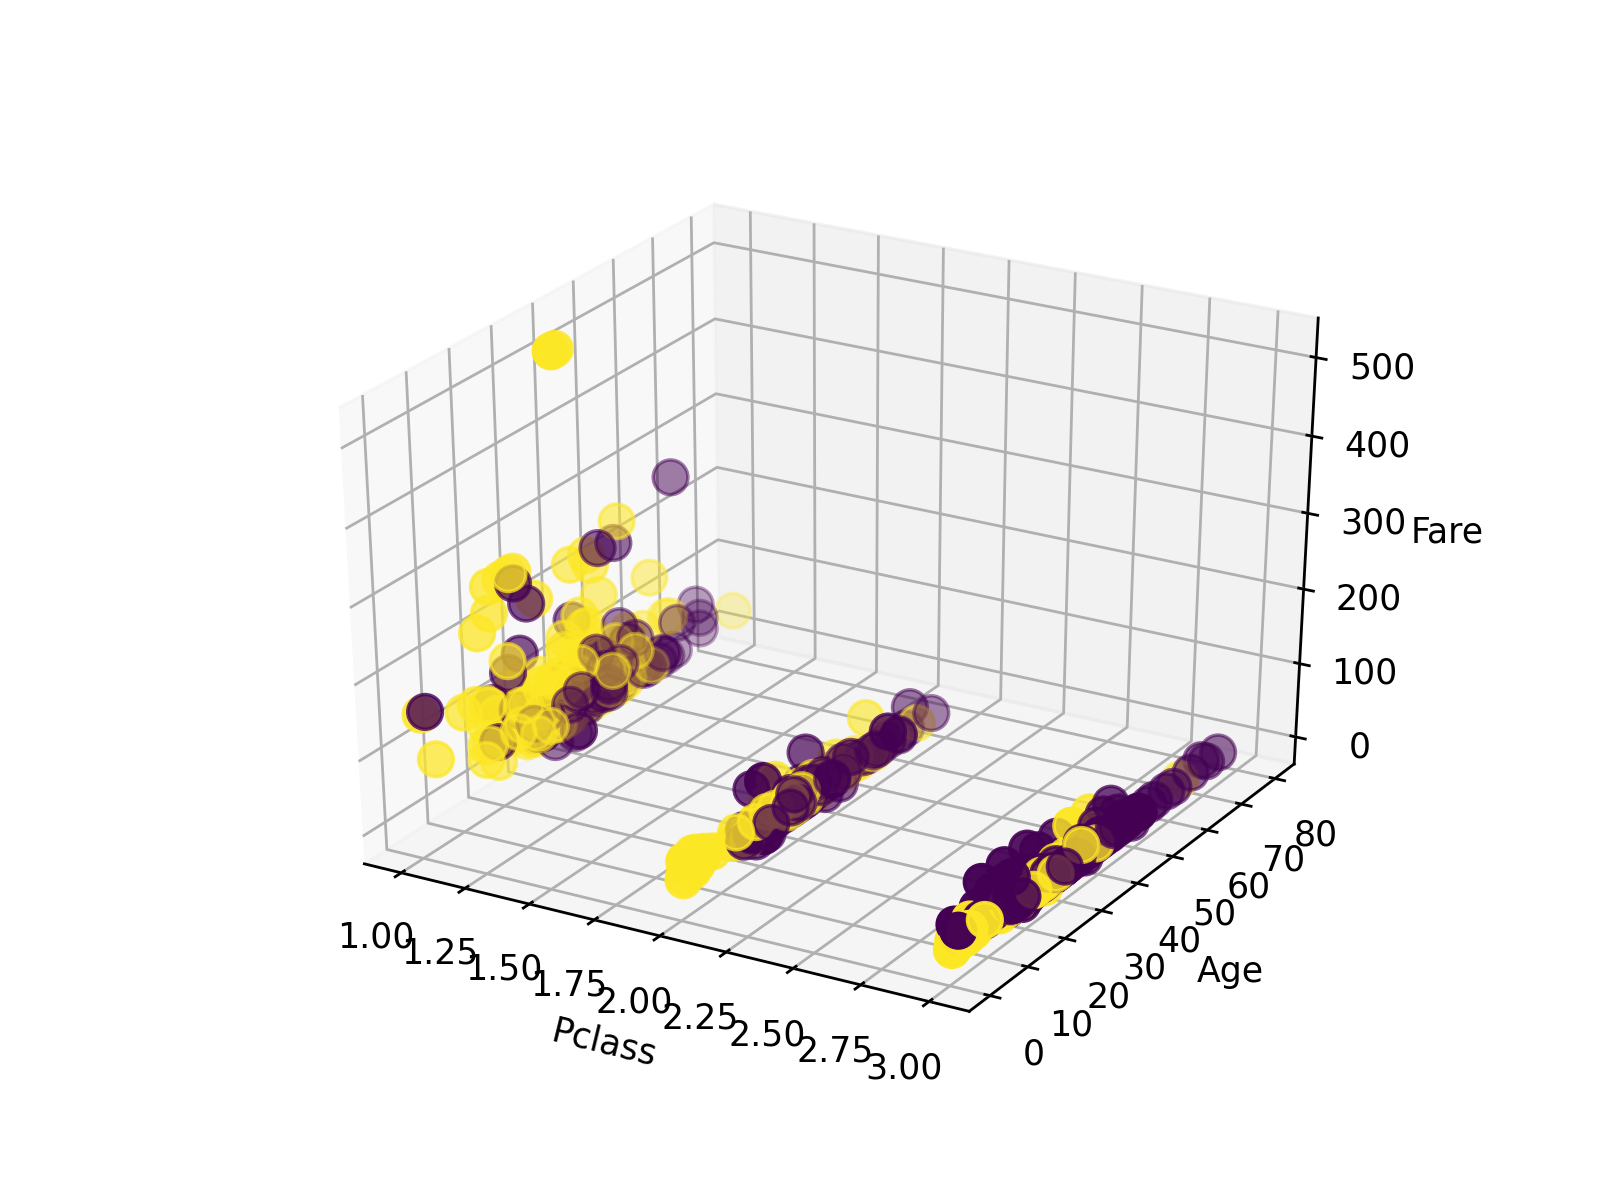

In [41]:
# plotting a 3D scatter plot
#this basically shows the relationship between Pclass, Age and Fare paid by passengers

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Pclass'], X_train['Age'], X_train['Fare'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('Pclass')
ax.set_ylabel('Age')
ax.set_zlabel('Fare')
plt.show()

<IPython.core.display.Javascript object>


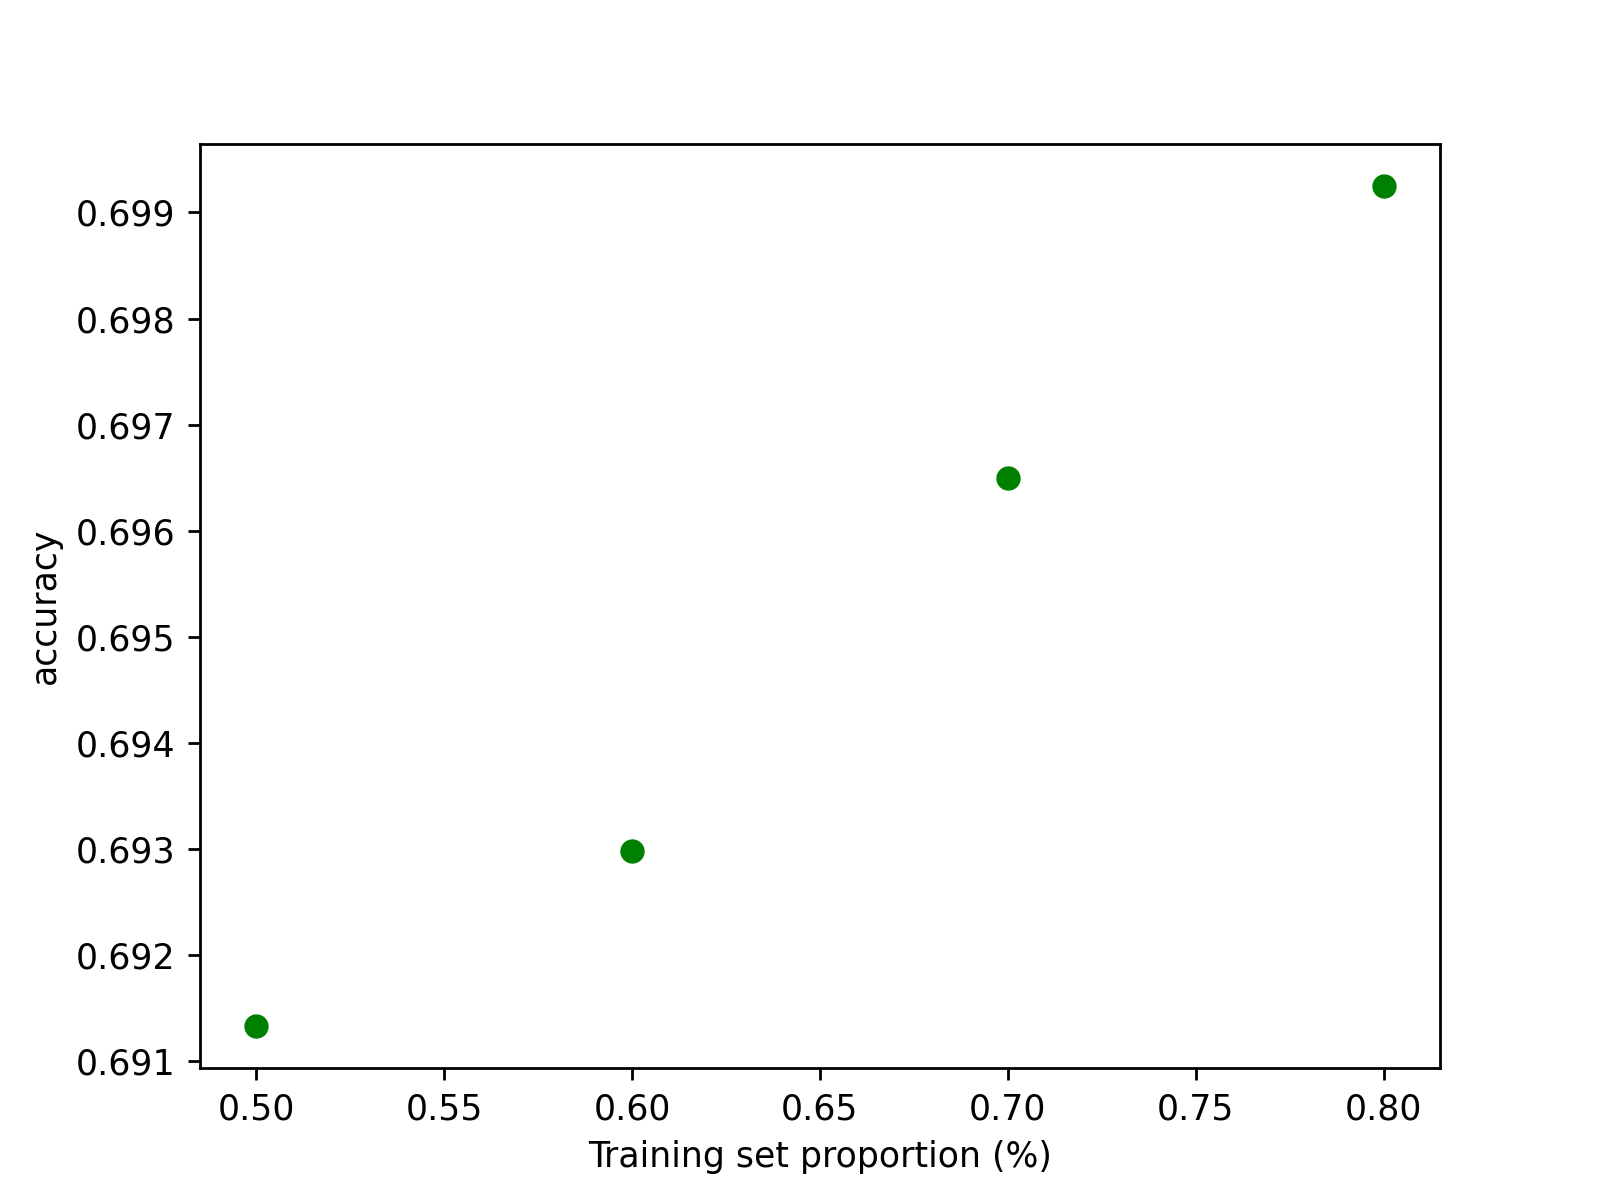

In [44]:
#This graph shows us how accurate the algorithm is based on the % of training set
t = [0.8, 0.7, 0.6,0.5]

knn = KNeighborsClassifier(n_neighbors = 13)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'go')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
plt.show()

from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)    # check out these hyperparameters
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 13).fit(X_train, y_train)


print('R-squared test score on training set: {:.3f}'.format(knnreg.score(X_train, y_train)))
print('R-squared test score on test set: {:.3f}'.format(knnreg.score(X_test, y_test)))

R-squared test score on training set: 0.260
R-squared test score on test set: 0.198


# Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linridge = Ridge(alpha=1.0).fit(X_train, y_train)

#print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
#print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
#print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

R-squared score (training): 0.388
R-squared score (test): 0.363


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
                                                   
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=1.0).fit(X_train_scaled, y_train)

#print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
#print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
#print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

R-squared score (training): 0.388
R-squared score (test): 0.364


# Lasso Regression

In [58]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)                                                   
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linlasso = Lasso(alpha=1.0, max_iter = 10000).fit(X_train_scaled, y_train)

#print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
#print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))
#print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'.format(linlasso.score(X_test_scaled, y_test)))



R-squared score (training): 0.000
R-squared score (test): -0.005



# Polynomial Features Classification

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)  #X_F1 is created above (in 'Synthesizing Datasets')
                                                   
linreg = LinearRegression().fit(X_train, y_train)

print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,random_state = 0)
                                                   
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'.format(linreg.score(X_test, y_test)))


X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state = 0)
                                                   
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

R-squared score (training): 0.388
R-squared score (test): 0.363

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) R-squared score (training): 0.428
(poly deg 2) R-squared score (test): 0.371

(poly deg 2 + ridge) R-squared score (training): 0.427
(poly deg 2 + ridge) R-squared score (test): 0.371


# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.79


# Support Vector Machine

In [67]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.79
Accuracy of Linear SVC classifier on test set: 0.78


# Decision Tree Classifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.80


In [5]:
clf2 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on test set: 0.84


## Prediction
This uses new data, test.csv, which is new input of our own preferences would we like to travel on the titanic and returns whether we would survive or not

In [11]:
from sklearn.tree import DecisionTreeClassifier

X = passenger[['sex', 'Pclass', 'Age', 'Fare']]
y = passenger['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

test = pd.read_csv('test.csv')
testx = test[['sex', 'Pclass', 'Age', 'Fare']]
somethingelse = clf.predict(testx,check_input=True)
for i in range(len(somethingelse)):
    print("{} - {}".format(somethingelse[i],test['Name'][i]))


Accuracy of DT classifier on training set: 0.85
Accuracy of DT classifier on test set: 0.82
1 - shung
0 - Julian 
1 - Adil
1 - Das
0 - Scotty 
0 - Yuri
0 - Sayeh
1 - Cocksucking Saloni


### Decision Tree representation attempt

This was our failed attempt at getting a diagram of the decision tree

In [146]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(100,90))
_ = tree.plot_tree(clf, 
                   feature_names=[str(test.sex),str(test.Pclass),str(test.Age),str(test.Fare)],  
                   class_names=str(test.Survived),
                   filled=True)
plt.savefig('1.png')

|--- feature_0 <= 0.50
|   |--- feature_2 <= 9.50
|   |   |--- feature_3 <= 20.83
|   |   |   |--- class: 1
|   |   |--- feature_3 >  20.83
|   |   |   |--- class: 0
|   |--- feature_2 >  9.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- feature_2 <= 36.50
|   |   |   |   |--- feature_2 <= 31.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  31.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  36.50
|   |   |   |   |--- feature_3 <= 31.66
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  31.66
|   |   |   |   |   |--- class: 0
|   |   |--- feature_1 >  1.50
|   |   |   |--- feature_3 <= 51.70
|   |   |   |   |--- feature_2 <= 32.25
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  32.25
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  51.70
|   |   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_1 <= 2.50
|   |   |--- feature_3 <= 28.86
|   |   |   |--- feature_2 <= 37.00
|   |   |

<IPython.core.display.Javascript object>